# Collatz Conjecture

I was reminded of the [Collatz Conjecture](https://automatetheboringstuff.com/chapter3/
) while studying python for my data science fundamentals course.

Here is the basic principle. 

Take any positive integer, n. If n is even, divide it by 2 (n/2). If n is odd, multiply it by 3 and add 1 (3n + 1). Repeat the process on the result (which has been called _“Half Or Triple Plus One”_, or HOTPO) indefinitely. 

The **Collatz Conjecture** is that _no matter what positive integer you begin with the result will eventually reach 1_.

If this seems counter-intuitive it is not just you. If we are tripling and adding one to the result half the time and cutting the result in half the other half of the time, you would think the number would grow very large eventually.

A while back [I wrote about this](https://sprestridge.net/excel/math/2016/08/10/Collatz-Conjecture.html) and developed an Excel spreadsheet with some VBA code to test a user input and store and graph the results. Turns out this is an interesting python excercise.

Enter number: 120021
your list of collatz integers is: 
[120021, 360064, 180032, 90016, 45008, 22504, 11252, 5626, 2813, 8440, 4220, 2110, 1055, 3166, 1583, 4750, 2375, 7126, 3563, 10690, 5345, 16036, 8018, 4009, 12028, 6014, 3007, 9022, 4511, 13534, 6767, 20302, 10151, 30454, 15227, 45682, 22841, 68524, 34262, 17131, 51394, 25697, 77092, 38546, 19273, 57820, 28910, 14455, 43366, 21683, 65050, 32525, 97576, 48788, 24394, 12197, 36592, 18296, 9148, 4574, 2287, 6862, 3431, 10294, 5147, 15442, 7721, 23164, 11582, 5791, 17374, 8687, 26062, 13031, 39094, 19547, 58642, 29321, 87964, 43982, 21991, 65974, 32987, 98962, 49481, 148444, 74222, 37111, 111334, 55667, 167002, 83501, 250504, 125252, 62626, 31313, 93940, 46970, 23485, 70456, 35228, 17614, 8807, 26422, 13211, 39634, 19817, 59452, 29726, 14863, 44590, 22295, 66886, 33443, 100330, 50165, 150496, 75248, 37624, 18812, 9406, 4703, 14110, 7055, 21166, 10583, 31750, 15875, 47626, 23813, 71440, 35720, 17860, 8930, 4465, 13396, 6698, 3349, 1004

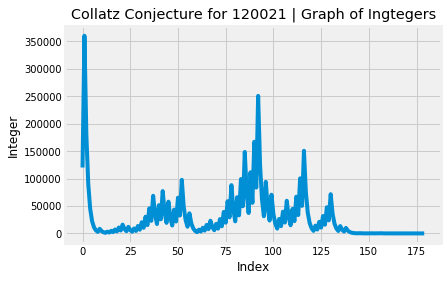

In [3]:
# collatz.py
# define a function that is the collatz conjecture - any positive integer will eventually reach 1
# n is even: n/2
# n is odd: 3n + 1
# HOTPO - half or triple plus one indefinitely
def collatz(number):
    if number % 2 == 0:
#        print(number // 2)
        return number // 2

    elif number % 2 == 1:
        result = 3 * number + 1
#        print(result)
        return result

import pandas as pd

# setup for plotting
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

collatz_list = []
pd.set_option('display.float_format', '{:,}'.format)

# prompt user
try:
    n = input("Enter number: ")
    seed = n
    while n != 1:
        collatz_list.append(int(n))
        n = collatz(int(n))
    print('your list of collatz integers is: ');
    print(collatz_list);
    print();
    print('steps to reach 1: ');
    print(len(collatz_list));    
    print();
    print('max number: ')
    print(max(collatz_list));
    df_collatz = pd.DataFrame(collatz_list)
    plt.plot(df_collatz)
    plt.title('Collatz Conjecture for ' + str(seed) + ' | Graph of Ingtegers', y=1.01)
    plt.xlabel('Index')
    plt.ylabel('Integer')
    
except ValueError:
    print('whoops, type an integer next time, neo.')

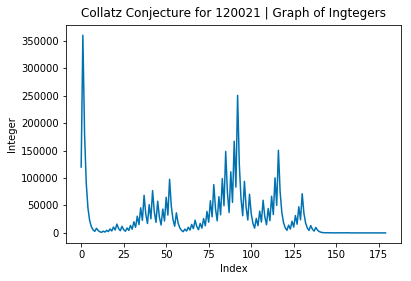

In [2]:
# run the code below to save the graph to file
plt.plot(df_collatz)
plt.title('Collatz Conjecture for ' + str(seed) + ' | Graph of Ingtegers', y=1.01)
plt.xlabel('Index')
plt.ylabel('Integer')

plt.savefig('collatz_conjecture.png');